In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
df = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.head()# First 5 rows of the data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop(["CustomerID"], axis = 1, inplace=True)#drops customerID to improve algorithm accuracy

# Age Data Visualization

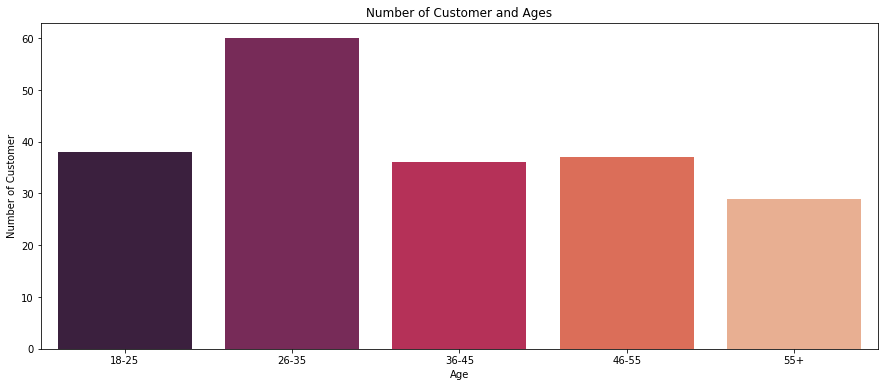

In [7]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

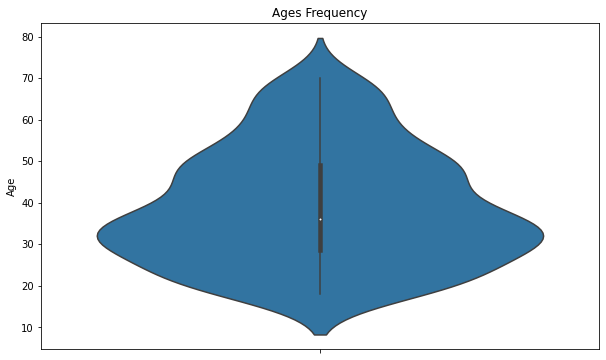

In [8]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

# Gender Breakdown

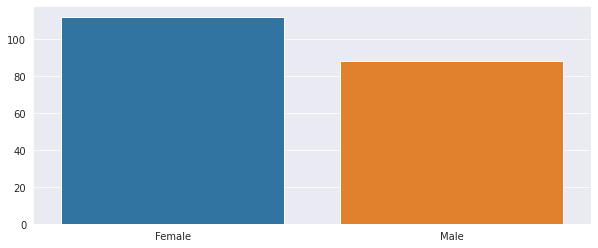

In [9]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

# Spending Score and Annual Income

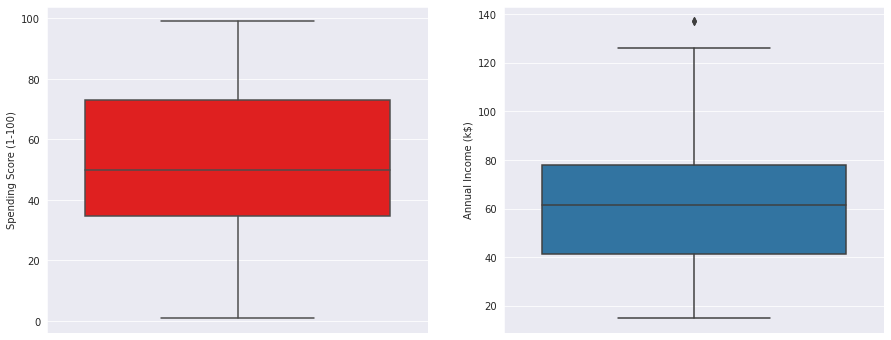

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

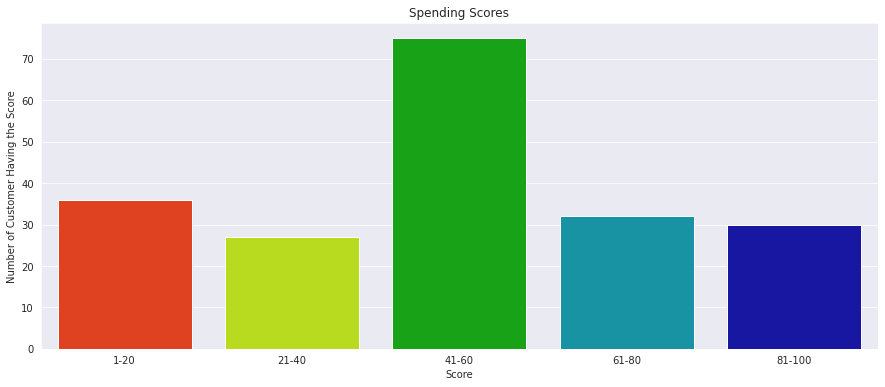

In [11]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

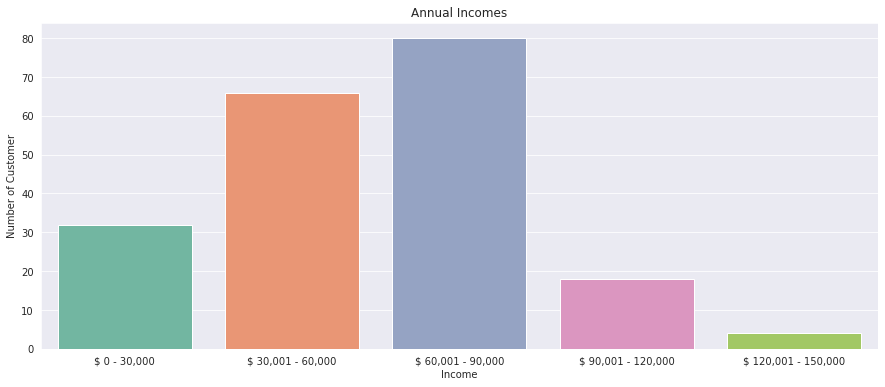

In [12]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [13]:
pip install pycaret

     |████████████████████████████████| 249 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 2.2 MB/s eta 0:00:011
     |████████████████████████████████| 14.1 MB 7.6 MB/s eta 0:00:01


     |████████████████████████████████| 77 kB 4.8 MB/s  eta 0:00:01
     |████████████████████████████████| 54 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 339 kB 26.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 26.3 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 34.0 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 2.8 MB/s  eta 0:00:01
     |████████████████████████████████| 45 kB 2.4 MB/s  eta 0:00:01


     |████████████████████████████████| 2.1 MB 34.4 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=ee97908c8569c19beeb13967d4efab4b1952fddbef488136e17787107aca52cf
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.14.1-py3-none-any.whl size=100577 sha256=f0a7d167d3e41d02dd85a37342216ba190d8ff992aee5255562eb329b60fe63d
  Stored in directory: /root/.cache/pip/wheels/7f/d9/25/baefac3eda0e7dbf143008d2b9865e0d923d4b7306136244fe
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.1-py3-none-any.whl size=17158 sha256=55ddca77c1d2198bf28318713936878410fe25bf1b664428ff19f7dc3bad86b9
  Stored in directory: /root/.cache/pip/wheels/c4/b6/b5/e76659f3b2a3a226565e27f0a7eb7a3ac93c3f4d68acfbe617
  Created wheel for pyod: filename=pyod-0.8.6-py3-none-any.whl size=112145 sha256=840d5fa490bc4b

In [14]:
import pycaret

In [15]:
from pycaret.clustering import *

df_preprocessing = setup(data = df, 
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(200, 4)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(200, 5)"
9,CPU Jobs,-1


In [16]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [17]:
kmeans = create_model('kmeans',num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4438,150.8489,0.8226,0,0,0


In [18]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 4
1,Male,21,15,81,Cluster 1
2,Female,20,16,6,Cluster 4
3,Female,23,16,77,Cluster 1
4,Female,31,17,40,Cluster 4


In [19]:
plot_model(kmeans)

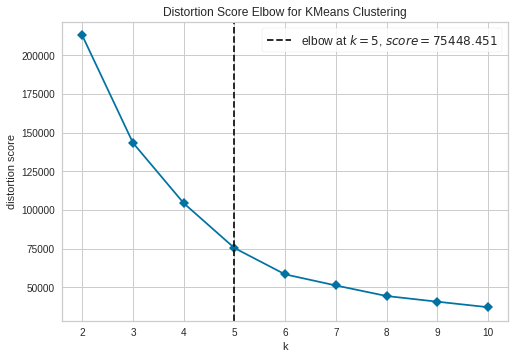

In [20]:
plot_model(kmeans, plot = 'elbow')# finds optimal number of clusters to pass as a parameter

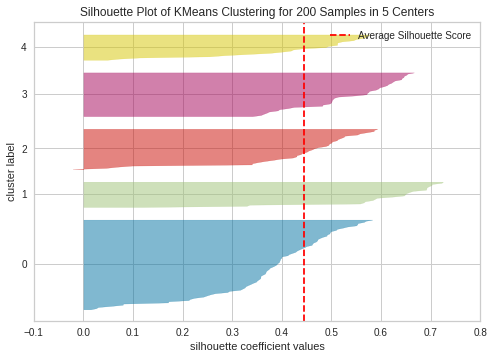

In [21]:
plot_model(kmeans, plot = 'silhouette')

# Concluding Remarks with Interactive Models

In [22]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [23]:
plot_model(kmeans, plot = 'distribution', feature = 'Age')# Focus on Cluster 0 which is mostly those between 30 and 35

In [24]:
plot_model(kmeans, plot = 'distribution', feature = 'Spending Score (1-100)')

In [25]:
plot_model(kmeans, plot = 'distribution', feature = 'Annual Income (k$)')

In [26]:
plot_model(kmeans, plot = 'distribution', feature = 'Gender')

* Focus on Cluster 0 and Cluster 3. 
* Cluster 0 has the greatest population and best overall spending score but Cluster 3 has a lot more disposable income. 
* Focus on recruiting more from Cluster 3 and maintaining your consumer base in Cluster 0.This will create the most efficient increase in profits. 
* More data is required but it's best to cater towards female adults.

In [27]:
save_model(kmeans,'Final KMeans Mall Customer Segmentation Model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe